<a href="https://colab.research.google.com/github/kondjiri/Satellite-Imagery-and-Deep-Learning/blob/master/Satellite_Imagery_Classification_Using_ResNet50_%26_MobileNetV2_%26_InceptionV3_Comparaison_Pretrained_Model_In_Keras_with_ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Les Modules**

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import tensorflow.keras as keras
from keras.models import Sequential,Model
from keras.layers import Dropout,Dense,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from keras.applications.resnet_v2 import ResNet50V2,preprocess_input,decode_predictions

from keras.applications.mobilenet_v2 import MobileNetV2

from keras.applications.inception_v3 import InceptionV3

from keras.applications.vgg16 import VGG16

import pickle
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array,load_img
from sklearn.metrics import roc_curve,auc

## **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def dataset():
  x = open('/content/drive/My Drive/DataSet/X.pickle','rb')
  x_train = pickle.load(x)
  data = np.array(x_train).reshape(-1,224,224,3)

  # Y_data
  y = open('/content/drive/My Drive/DataSet/Y.pickle','rb')
  y_label = pickle.load(y)
  label = np.array(y_label).reshape(-1,1)
  train_x,test_x,train_y,test_y = train_test_split(data,label,test_size=0.2,random_state=10)
  train_x,test_x = (train_x.astype('float32'))/255.0,(test_x.astype('float32'))/255.0
  train_y,test_y = to_categorical(train_y,21),to_categorical(test_y,21)
  return train_x,test_x,train_y,test_y

In [ ]:
train_x,test_x,train_y,test_y = dataset()

In [ ]:
def plot_roc_auc(test_y,y_score):
  lw = 2

  n_classes=21
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(figsize=[7,7])
  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle([
                  'aqua',
                  'darkorange',
                  'cornflowerblue',
                  'cyan',
                  'black',
                  'red',
                  'green',
                  'yellow',
                  'magenta',
                  'blue',
                  'purple',
                  'pink',
                  'orange',
                  'gray',
                  'brown',
                  'olive',
                  'navy',
                  'tomato',
                  'bisque',
                  'lime',
                  'indigo'
                  ])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Toutes les classes')
  plt.legend(loc="lower right")
  plt.show()


  # Zoom in view of the upper left corner.
  plt.figure(figsize=[7,7])
  plt.xlim(0, 0.2)
  plt.ylim(0.8, 1)
  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle([
                  'aqua',
                  'darkorange',
                  'cornflowerblue',
                  'cyan',
                  'black',
                  'red',
                  'green',
                  'yellow',
                  'magenta',
                  'blue',
                  'purple',
                  'pink',
                  'orange',
                  'gray',
                  'brown',
                  'olive',
                  'navy',
                  'tomato',
                  'bisque',
                  'lime',
                  'indigo'
                  ])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Zoomer')
  plt.legend(loc="lower right")
  plt.show()

## **ResNet_50 Model**

In [ ]:
def model_resnet_50():
  model = ResNet50V2(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
  for layer in model.layers:
    layer.trainable=False

  x = model.output
  x = Dense(1024, activation = "relu")(x)
  x = Dense(128, activation = "relu")(x)
  pred = Dense(21, activation = "softmax")(x)
  net = Model(inputs=model.input, outputs = pred)
  net.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
  return net

In [ ]:
resnet = model_resnet_50()

94674944/94668760 [==============================] - 3s 0us/step


In [ ]:
callbacks = [EarlyStopping(patience=3,monitor='val_accuracy')]
hist = resnet.fit(train_x,train_y,epochs=100,verbose=1,validation_split=0.2,batch_size=128,callbacks=callbacks)

Epoch 1/100
11/11 [==============================] - 13s 1s/step - loss: 1.4069 - accuracy: 0.6257 - val_loss: 0.4988 - val_accuracy: 0.8482
Epoch 2/100
11/11 [==============================] - 8s 760ms/step - loss: 0.1899 - accuracy: 0.9420 - val_loss: 0.5912 - val_accuracy: 0.8304
Epoch 3/100
11/11 [==============================] - 8s 763ms/step - loss: 0.0939 - accuracy: 0.9717 - val_loss: 0.3353 - val_accuracy: 0.8958
Epoch 4/100
11/11 [==============================] - 8s 761ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.3896 - val_accuracy: 0.8780
Epoch 5/100
11/11 [==============================] - 8s 762ms/step - loss: 0.0125 - accuracy: 0.9993 - val_loss: 0.3183 - val_accuracy: 0.8988
Epoch 6/100
11/11 [==============================] - 8s 767ms/step - loss: 0.0071 - accuracy: 0.9993 - val_loss: 0.3413 - val_accuracy: 0.8899
Epoch 7/100
11/11 [==============================] - 8s 770ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3148 - val_accuracy: 0.9048
E

In [ ]:
# loss,acc = resnet.evaluate(test_x,test_y,verbose=1)
# print(' ResNet_50 on testing set:  Loss : {:.2f} & Accuracy : {:.2f}%'.format(loss,acc*100))

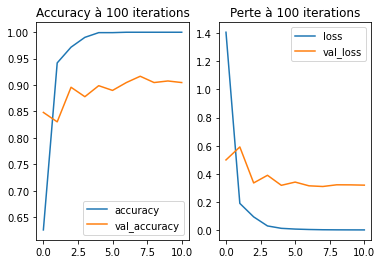

In [ ]:
plt.subplot(121)
for performance in ['accuracy','val_accuracy']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Accuracy à 100 iterations')
  plt.legend()
plt.subplot(122)
for performance in ['loss','val_loss']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Perte à 100 iterations')
  plt.legend()
plt.show()

## **ROC AUC**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


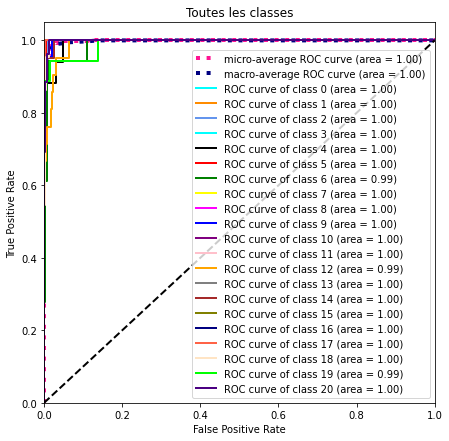

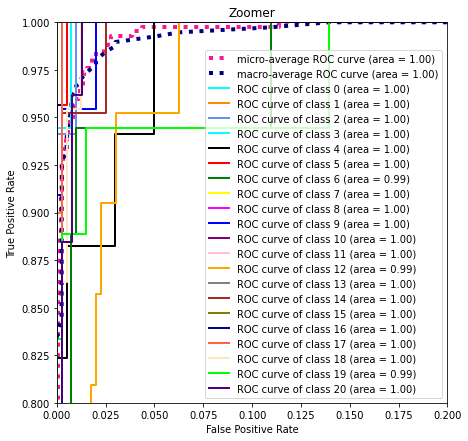

In [ ]:
y_score = resnet.predict(test_x)
plot_roc_auc(test_y,y_score)

#####**Test image** 

In [ ]:
def make_prediction(img_url=None):

  if img_url==None:
    print('Veuillez entrer une image ')
  else:
    image = load_img(img_url,target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    pred = resnet.predict(image)[0]
    img = cv2.imread(img_url)
    r,b,g =cv2.split(img)
    img_show = cv2.merge([r,g,b]) 

    
    label_dict = {
              0:'agricultural',
              1:'airplane',
              2:'baseballdiamond',
              3:'beach',
              4:'buildings',
              5:'chaparral',
              6:'denseresidential',
              7:'forest',
              8:'freeway',
              9:'golfcourse',
              10:'harbor',
              11:'intersection',
              12:'mediumresidential',
              13:'mobilehomepark',
              14:'overpass',
              15:'parkinglot',
              16:'river',
              17:'runway',
              18:'sparseresidential',
              19:'storagetanks',
              20:'tenniscourt'
      }
    label = np.argmax(pred)
    print(label)
    plt.figure(figsize=[5,5])
    plt.imshow(img_show)
    plt.title(label_dict[label])
    plt.show()

11


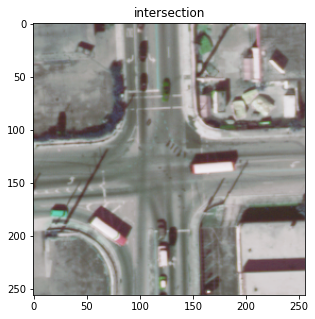

In [ ]:
make_prediction(
    '/content/drive/My Drive/images/intersection170.png'
    )

## **Mobile_Net_V2  Model**

In [ ]:
def model_mobile_net_v2():
  model = MobileNetV2(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
  for layer in model.layers:
    layer.trainable=False

  x = model.output
  x = Dense(1024, activation = "relu")(x)
  x = Dense(128, activation = "relu")(x)
  pred = Dense(21, activation = "softmax")(x)
  net = Model(inputs=model.input, outputs = pred)
  net.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
  return net

In [ ]:
mobile_net = model_mobile_net_v2()

9412608/9406464 [==============================] - 1s 0us/step


In [ ]:
hist = mobile_net.fit(train_x,train_y,epochs=100,verbose=1,validation_split=0.1,batch_size=128,callbacks=callbacks)

Epoch 1/100
12/12 [==============================] - 6s 488ms/step - loss: 1.2829 - accuracy: 0.6508 - val_loss: 0.3859 - val_accuracy: 0.8750
Epoch 2/100
12/12 [==============================] - 4s 306ms/step - loss: 0.1756 - accuracy: 0.9471 - val_loss: 0.3291 - val_accuracy: 0.8810
Epoch 3/100
12/12 [==============================] - 4s 308ms/step - loss: 0.0721 - accuracy: 0.9749 - val_loss: 0.3491 - val_accuracy: 0.8690
Epoch 4/100
12/12 [==============================] - 4s 305ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.2507 - val_accuracy: 0.9048
Epoch 5/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0176 - accuracy: 0.9967 - val_loss: 0.2964 - val_accuracy: 0.9107
Epoch 6/100
12/12 [==============================] - 4s 304ms/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.2561 - val_accuracy: 0.9107
Epoch 7/100
12/12 [==============================] - 4s 307ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.2105 - val_accuracy: 0.9286

In [ ]:
# loss,acc = mobile_net.evaluate(test_x,test_y,verbose=1)
# print(' Mobile_Net:  Loss : {:.2f} & Accuracy : {:.2f}%'.format(loss,acc*100))

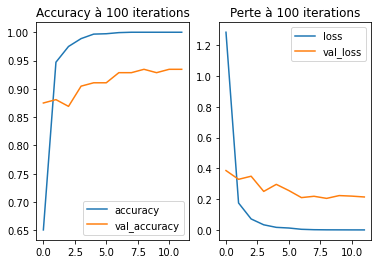

In [ ]:
plt.subplot(121)
for performance in ['accuracy','val_accuracy']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Accuracy à 100 iterations')
  plt.legend()
plt.subplot(122)
for performance in ['loss','val_loss']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Perte à 100 iterations')
  plt.legend()
plt.show()

###**ROC & AUC**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


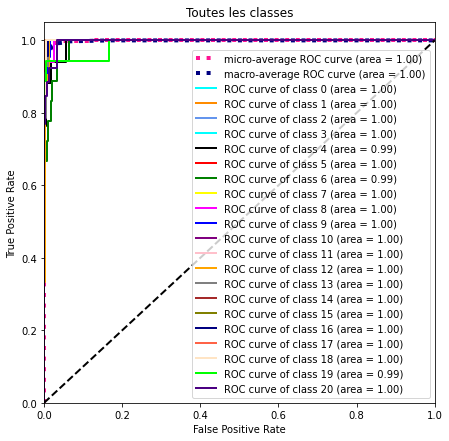

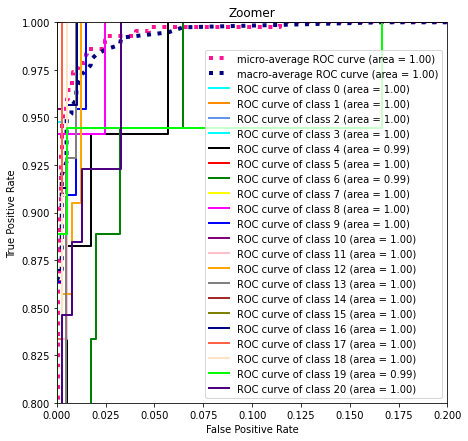

In [ ]:
y_score_mob = mobile_net.predict(test_x)
plot_roc_auc(test_y,y_score_mob)

## **Inception_V3 Model**

In [ ]:
def model_inception_v3():
  model = InceptionV3(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
  for layer in model.layers:
    layer.trainable=False

  x = model.output
  x = Dense(1024, activation = "relu")(x)
  x = Dense(128, activation = "relu")(x)
  pred = Dense(21, activation = "softmax")(x)
  net = Model(inputs=model.input, outputs = pred)
  net.compile(loss = keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ['accuracy'])
  return net

In [ ]:
inception_v3 = model_inception_v3()

87916544/87910968 [==============================] - 8s 0us/step


In [ ]:
hist = inception_v3.fit(train_x,train_y,epochs=100,verbose=1,validation_split=0.1,batch_size=128,callbacks=callbacks)

Epoch 1/100
12/12 [==============================] - 12s 1s/step - loss: 1.9374 - accuracy: 0.4815 - val_loss: 0.7525 - val_accuracy: 0.7976
Epoch 2/100
12/12 [==============================] - 7s 564ms/step - loss: 0.4642 - accuracy: 0.8690 - val_loss: 0.3691 - val_accuracy: 0.8810
Epoch 3/100
12/12 [==============================] - 7s 563ms/step - loss: 0.2271 - accuracy: 0.9352 - val_loss: 0.3755 - val_accuracy: 0.8631
Epoch 4/100
12/12 [==============================] - 7s 563ms/step - loss: 0.1170 - accuracy: 0.9663 - val_loss: 0.3796 - val_accuracy: 0.8512
Epoch 5/100
12/12 [==============================] - 7s 568ms/step - loss: 0.0674 - accuracy: 0.9848 - val_loss: 0.3378 - val_accuracy: 0.8929
Epoch 6/100
12/12 [==============================] - 7s 566ms/step - loss: 0.0327 - accuracy: 0.9947 - val_loss: 0.3066 - val_accuracy: 0.8929
Epoch 7/100
12/12 [==============================] - 7s 566ms/step - loss: 0.0228 - accuracy: 0.9974 - val_loss: 0.3236 - val_accuracy: 0.9107
E

In [ ]:
# loss,acc = inception_v3.evaluate(test_x,test_y,verbose=1)
# print(' Inception_Net_V3:  Loss : {:.2f} & Accuracy : {:.2f}%'.format(loss,acc*100))

14/14 [==============================] - 1s 63ms/step - loss: 0.3402 - accuracy: 0.9000
 Inception_Net_V3:  Loss : 0.34 & Accuracy : 90.00%


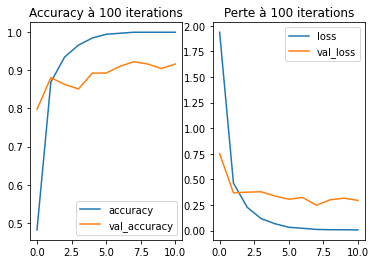

In [ ]:
plt.subplot(121)
for performance in ['accuracy','val_accuracy']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Accuracy à 100 iterations')
  plt.legend()
plt.subplot(122)
for performance in ['loss','val_loss']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Perte à 100 iterations')
  plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


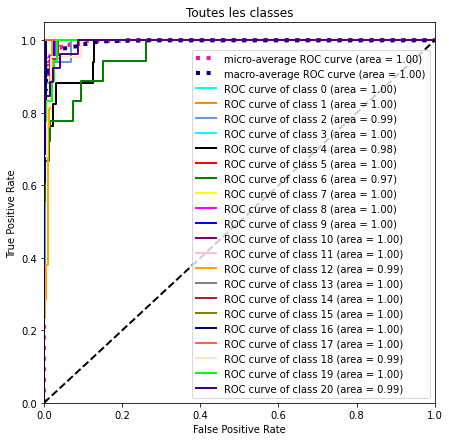

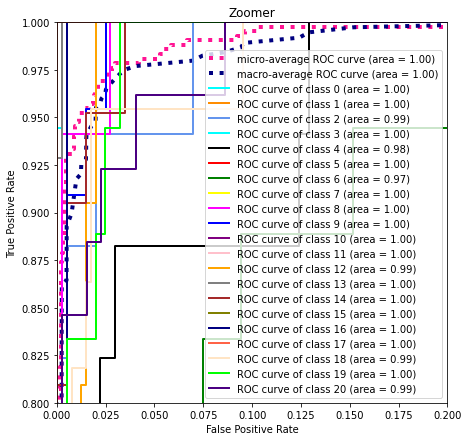

In [ ]:
y_score_inception = inception_v3.predict(test_x)
plot_roc_auc(test_y,y_score_inception)